In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import mmh3
import hashlib
import bitarray
import math

In [47]:
pip install mmh3

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install bitarray

Note: you may need to restart the kernel to use updated packages.


# Probabilistic data structure - Bloom Filter

## Abstract 
In this notebook, I will discuss deterministic and probabilistic data structures as well as related concepts such as complexity analysis and hashing. The **Bloom Filter** is one such interesting structure. I will take a closer look at what it is, how it works, its algorithm, operations it supports, comparison with a non-probabilistic data structure. Finally, I will discuss the application of Bloom Filter with examples. Enjoy reading!

## Contents
1. Overview of data structures
   * Definition
   * Examples
2. Complexity analysis
   * Time complexity
   * Space complexity
3. Hashing
   * Definition
   * Hash collision
   * Importance
4. Probabilistic data structures
   * Definition
     * Where the probabilistic behavior comes from?
   * Advantages
5. Introduction to Bloom Filter
   * History
   * Definition
   * Construction
6. Working of a Bloom Filter
   * Operations
       * Probabilities associated with these operations
       * Runtime analysis of operations
       * Space complexity analysis
   * Comparison with non probabilistic data structure (Hash Table)
   * Pros and cons
7. Reliability study
8. Usage of Bloom Filters
   * example
   * explanation
   * implementation
9. Conclusion
10. References

# 1. Data structure

One of the most important questions in computer science is how to store and organize data. With the development of the first electronic computers the need for efficient data organization became evident. These early computers used simple data structures like arrays to manage data. Data structures are crucial and play a foundational role in computing.

**Data structure** is a way of organizing, managing and storing data in a computer so that it can be accessed fast and modified efficiently. Data structures rely on the computer's capability to access and store data at any location in its memory, determined by a pointer. A pointer is a bit string that represents a memory address and can be stored and managed by the program. In programming data structure is often chosen or created to store data specifically for use with various algorithms. Usually, the fundamental operations of the algorithm are closely linked to the design of the data structure. Data structures are important to computer science for many reasons:
   * Efficiency: Efficient data structures allow for the efficient storage, retrieval and modification of data. This can significantly improve the performance of software applications and algorithms, particularly those that need to process large amounts of data.
   * Resource management: Data structures can help manage system resources such as memory and CPU time more effectively. For example, using a memory-efficient data structure can help a program run on systems with limited resources.
   * Scalability: As applications grow in complexity and data volume, appropriate data structures help ensure that the software remains scalable and performs well.
   * Complex problem solving: Many complex problems in computer science can be broken down and solved more easily with the help of appropriate data structures. For example hash tables provide O(1) constant time complexity for insertion, deletion and lookup operations, making them ideal for software that requires fast access to data such as dictionaries..
   * Code readability and maintainability: Using well-known data structures can make code more readable and easy to maintainance.

Different kinds of data structures are suited to different specific tasks. The choice of data structure can affect the performance of a program or algorithm, making it a crucial consideration in software development and computer science. Data structures can be divided into 2 categories: linear and non-linear. **Examples** of commonly used data structures:

**Array** is the most simplest linear data structure. They represent collections of elements, stored in contiguous memory locations. Each element is identified and can be accessed directly using its index, which takes constant time. The index is usually a non-negative integer. All elements in an array are typically of the same data type. Many other data structures such as stacks and queues can be implemented using arrays. Arrays are ideal for storing sequences of data such as lists of numbers. Multidimensional arrays are used to represent matrices.s.

**Linked List** is a linear data structure in which each element, called a node, contains a data part and link. Data is the value or data part of the node.
Link is the reference to the next node in the collection. This structure allows for efficient insertion and deletion of elements. There are several variations of them like singly linked lists, doubly linked lists. Linked list implement undo functionality in software applications where each action is stored as a node.

**Stack** is linear collection of elements with last-in, first-out (LIFO) access - the last element added is the first one to be removed. It can be implemented using arrays or linked lists. The insert (push) and delete (pop) operations take constant time O(1). It is used in situations where the most recently added element needs to be accessed first, such as in backtracking, undo mechanisms.

**Queue** is another linear collection of elements with first-in, first-out (FIFO) access - the first element added is the first one to be removed. Enqueue (adding) and dequeue (removing) operations have O(1) time complexity. Queues are suitable for applications which manage tasks and processes in a fair order like task scheduling softwares. In graph traversal algorithms like Breadth First Search, queues are used to explore nodes level by level.

**Tree** is non-linear hierarchical data structure consisting of nodes. It is representing relationships with a parent-child structure. The tree has root - the topmost node of a tree, which has no parent. Node - each element in the tree, consisting of a value and references to child nodes. Edge - the link between a parent node and a child node. Leaf - a node with no childrens. The tree support different operations like insertion, deletion, searching.  It is commonly used to implement efficient search algorithms, to represent hierarchical relationships, such as file systems.

**Graph** is a widely-used data structure in computer science. It is a non-linear data structure which consist nodes (vertices) and edges, that connect pairs of nodes. Basic operations on graphs are adding nodes and edge and traversal. Traversal is the process of visiting all nodes in the graph. The two main methods are: Depth-First Search (DFS) and Breadth-First Search (BFS). Graphs find use in social networks, communication networks.

# 2. Complexity analysis 

**Complexity analysis** is a fundamental aspect of computer science that involves evaluating the efficiency of data structures and algorithms. It provides a theoretical estimate of the resources - time complexity and space complexity, needed by an algorithm to solve a problem of a particular size. Complexity analysis helps developers understand how algorithms will perform as the size of the input grows, ensuring that they can choose the most efficient algorithm for their specific use case. Complexity analysis is useful in understanding the efficiency of different algorithms and choosing the best one for a specific problem. It allows predicting how an algorithm will perform as the input size increases. It can also helps for optimization of algorithms and resource management.

## Time complexity
Time complexity is computational complexity, used to measure the performance of algorithms. It is a way to describe how long - the time an algorithm takes to run, depending on the size of the input it is given. It is usually expressed using **Big O notation** which describes the upper bound of the algorithm's growth rate - it gives the worst-case scenario. Here are some common runtimes:
 * **Constant time  O(1)** - the algorithm takes the same amount of time to run, no matter how big the input is. Example for constant time is geting the element in an array by its index.
 * **Logarithmic time  O(log n)** - the number of steps needed to complete the algorithm increases slowly, even if the input size grows large. Each step of the algorithm reduces the problem size by a constant factor (usually by half). For example binary search in a sorted list.
 *  **Linear time O(n)** - the algorithm must check each element once, so the execution time grows linearly with the number of input. For example iterating through all elements of an array to find a specific value.
 *  **Log-Linear time O(n log n)** - running time grows proportionally to the size of the input multiply by the logarithm of the input size. Merge sort is a classic example where the division steps are repeated log n times (due to the halving process) and merging takes linear time on each level, so the combination of both have time complexity O(n log n).
 *  **Quadratic time O(n^2)** - the running time increases quadratically as the input size grows. Тhe algorithm typically involves nested loops. This means that for every element in the input, the algorithm performs a linear number of operations. For example bubble sort, where each element is compared with every other element.
 *  **Exponential time O(2^n)** - the execution time grows exponentially with the input size. Each increase in input size causes the number of operations to double. This is exponential growth and it can become extremely large very quickly. The recursive Fibonacci sequence is a classic example, where each number requires the calculation of the two preceding numbers.
 *  **Factorial time O(!n)** - the running time grows factorially with the input size. This type of growth is extremely rapid. Typical example of an O(n!) algorithm is generating all possible permutations of a set of n elements. If the set has 4 elements, there are 4! = 24 possible permutations.

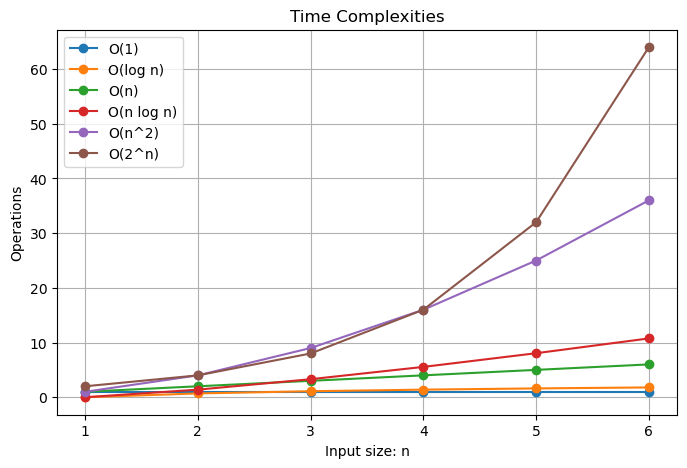

In [5]:
# Define the input sizes (n):
n = np.arange(1, 7)

# Define the function for each runtime:
constant = np.ones_like(n)
logaritmic = np.log(n)
linear = n
log_linear = n * np.log(n)
quadratic = n ** 2
exponential = 2 ** n

# Plot the functions:
plt.figure(figsize=(8, 5))
plt.plot(n, constant, label="O(1)", marker="o")
plt.plot(n, logaritmic, label="O(log n)", marker="o")
plt.plot(n, linear, label="O(n)", marker="o")
plt.plot(n, log_linear, label="O(n log n)", marker="o")
plt.plot(n, quadratic, label="O(n^2)", marker="o")
plt.plot(n, exponential, label="O(2^n)", marker="o")

plt.xlabel("Input size: n")
plt.ylabel("Operations")
plt.title("Time Complexities")
plt.legend()
plt.grid(True)
plt.show()

## Space complexity
Space complexity refers to the amount of memory space that an algorithm requires to complete its execution. Memory can be categorized into two main types: RAM (Random Access Memory) and storage drives (hard drives, flash drives). RAM is fast, temporary memory used by the system to store data that is actively being used or processed, but when the computer is turned off data stored in RAM is lost. Storage Drives provide persistent storage that retains data even when the computer is turned off.

When evaluating an algorithm's space complexity, it is concerned with how much RAM the algorithm needs to run. 
It is sum of auxiliary space used by the algorithm itself and the memory used by input variables. Space complexity is also influenced by the data structures and additional memory (function calls). To calculate space complexity, you need to account for all the memory consumed by the variables and data structures used by an algorithm. This includes primitive variables (int, float), composite variables (arrays, lists), function calls (recursive functions). 

# 3. Hashing in data structures

## Definition
Hashing is a fundamental concept in computer science. It involves transforming data into a fixed-size value - hash code, using a hash function. This process is akin to creating a "shortcut" for data, which enables quick and easy access to data. 
 * Hash function is a mathematical function that takes input data - message and produces a fixed-size string of bytes - hash code. The same input will always yield the same hash code, but even a small change in the input will produce a vastly different hash code. The goal is to distribute data evenly across possible hash codes to minimize collisions (when different inputs produce the same hash code).
 * Hash code is the result of applying a hash function to input data. This code is usually a shorter, fixed-length representation of the original data. For example the hash code for a long piece of text could be a small integer value or a short string of characters.
 * Hash table or hash map is data structure that uses an array and a hash function to quickly locate a data record given its search key. The hash table uses the hash code generated by the hash function to index into an array, enabling fast data retrieval. Тhe hash function turns each key into a unique index within the size limits of the hash table. This ensures that the keys are distributed evenly across the table, reducing the chance of collisions.

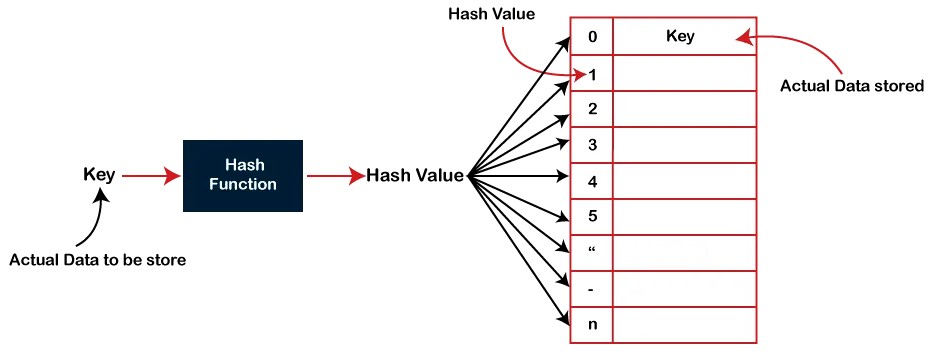

Main goals of a hash function:
* Speed - the hash function should be fast to compute.
* Uniform distribution - the hash function should distribute input values uniformly across the hash table to minimize collisions.
* Determinism - the hash function should always return the same hash code for the same input.

There are many types of hash functions, each with its own algorithm. Division method, Multiplication method, Folding method, Cryptographic hash functions (MD5, SHA-256), Universal hashing etc. 
In the Division method (modular hashing) *k* is the input and *m* is the size of the hash table. This method takes the remainder when *k* is divided by *m*. It's important to select an appropriate value for *m*. It is preferable *m* to be a prime number. This ensures that there is an uniform distribution of keys and minimization of collisions.
$$ hash(k) = k \% m , m \in \mathbb{P} $$

For example if size of hash table is power of 2: $ m = 16 = 2^4 $ the hash function uses only the last 4 bits of key *k* (in binary) to calculate the index in the hash table. If $k_1$ = 21, 21 in binary = 10101, if $k_2$ = 37, 37 in binary = 100101, if $k_3$ = 53, 53 in binary = 110101, so the last 4 bits for all three keys are the same 0101 = 5:
$$ hash(21) = 21 \% 16 = 5 $$
$$ hash(37) = 37 \% 16 = 5 $$
$$ hash(53) = 53 \% 16 = 5 $$
To avoid these collisions, it is better to choose a hash table size *m* that is a prime number and not a power of 2. For example *m* = 17:
$$ hash(21) = 21 \% 17 = 4 $$
$$ hash(37) = 37 \% 17 = 3 $$
$$ hash(53) = 53 \% 17 = 2 $$

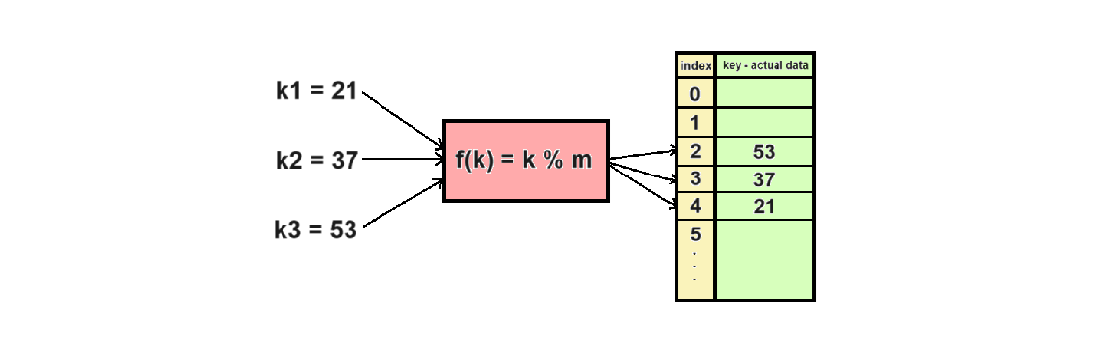

## Hash collision
A collision in hash table occurs when two different keys produce the same hash value. This leads to situation where multiple keys are mapped to the same location (index) in the hash table. Collisions are possible due to the finite size of hash tables compared to the potentially infinite number of possible keys. They may be due to a weak hashing algorithm. Hashing collisions can significantly affect the performance, security, and integrity of data and systems. The efficiency of hashing depends on the load factor *α*, which is the ratio of the number of records *n* to the table size *m*: $ α = n / m $ . Load factor indicates how full the hash table is. \
**Open hashing** and **Closed hashing** are the two main techniques for handling collisions.

### Open hashing
Open hashing also known as **Separate chaining** is technique where for each index in the hash table there is slot stores linked list of elements. This allow multiple elements to exist at the same index. Collisions are resolved by adding elements with the same hash value to the corresponding linked list. When searching for an element, it is necessary to traverse through the linked list in the corresponding index until the desired key is found. This method is simple to implement but it may require additional memory to store pointers to linked lists. The average-case time complexity for search operations (successful and unsuccessful) is O(1 + *α*). If the hash function distributes elements uniformly and the load factor is kept reasonably low (*α* < 1), the average-case performance is very efficient and close to O(1). The worst case - O(n), when all elements hash to the same slot is very rare.

### Closed hashing
Closed hashing also known as **Open addressing** is based on the fact that if a collision occurs, it is handled by finding an alternate location in the hash table. Typically, load factor of 0.7 or less is recommended for open addressing. There are three methods: Linear probing, Quadratic probing and Double hashing. \
**Linear probing**: If a collision occurs at particular position, search for the next available position by probing sequentially. The fuller the table becomes, the number of collisions increases, leading to primary clustering (when multiple keys hash to the same location). This can degrade performance, causing the time complexity to approach O(n) as the table fills up. \
**Quadratic Probing**: Probe positions in a quadratic sequence until an empty slot is found. This reduces primary clustering compared to linear probing, but it can still suffer from secondary clustering (keys hash to different locations, but the collision-resolution has resulted in new collisions.) and may degrade towards O(n) in the worst case. \
**Double Hashing**: Use a secondary hash function to calculate the step size for probing. This technique is generally more efficient than linear and quadratic probing and can maintain an average-case time complexity closer to O(1) for higher load factors. However the worst-case scenario can still approach O(n).

|                                  **Open hashing**                                  |                  **Closed hashing**                  |
|:----------------------------------------------------------------------------------:|:----------------------------------------------------:|
| simple to implement                                                                |              requires more conputations              |
| never fills up                                                                     | the table may become full                            |
| used when it is unknown how many elements or how frequently keys may be inserted   | used when frequency and number of keys is known      |
| bad cache performance - used extra space for linked lists                          | better cache performance - there are no linked list  |
| keys are stored using linked lists                                                 | everything is stored in one table                    |

## Importance of hashing
Hash functions and hash tables are essential for efficient data storage and retrieval. In Python, they are particularly important for their role in the implementation of dictionaries and sets. Main advantages of hashing are:
* Fast search and retrieval - hash tables provide nearly constant time complexity O(1) for operations like insertion, deletion and lookup. This makes them highly efficient for quick access to data. For example in linked list each element points to the next element in the sequence. The aren't direct access to element at specific index in a linked list. Here’s why searching in a linked list requires linear time O(n).
* Efficient memory usage - the good hash function distribute elements evenly across the hash table, minimizing collisions and ensuring efficient use of memory.
* Flexibility - hash tables can store various types of data like integers, strings, objects. This flexibility makes them versatile and suitable for many applications.

# 4. Probabilistic data structures

## Definition
With every year information volumes are growing exponentially and traditional deterministic data structures face difficulties and limitations. Here's where **Probabilistic data structures** (PDS) come in, offering several advantages. They are a type of data structure that use probabilistic algorithms to store, process and retrieve information. They differ from traditional deterministic data structures, which rely on fixed rules and operations. Probabilistic data structures use randomization and approximation techniques with a high degree of accuracy but not 100%. They are a powerful tool for information processing, offering a balance between efficiency, adaptability and simplicity. They are particularly useful when working with large datasets. 

**The probabilistic behavior** in probabilistic data structures stems from the utilization of probabilistic algorithms. These algorithms incorporate randomness into their decision-making processes, which allows them to achieve efficiency with an acceptable level of accuracy. 

There are several categories Probabilistic data structurse:
1. Membership:
PDS for membership checking determine whether a given element belongs to a specific set. They are particularly useful for large datasets where exhaustive search would be computationally expensiveFor example, Bloom filter uses a bit array and hash functions to efficiently check if an element belongs to a set. It offers fast lookup time and constant memory usage, but has a small probability of false positives.s.

2. Cardinality:
PDS for cardinality estimation aim to approximate the number of unique elements in a set. They are particularly useful for tasks like counting. For ex, mple HyperLg. It is a widely used PDS for cardinality estimation. It offers high accuracy with extremely low memory consumption.

3. Frequency:
PDS for frequency estimation aim to approximate the frequency of occurrence of elements in a data stream. They are particularly useful for tasks like identifying the most popular items in an e-commerc  store.
For example Count-Min Sketch. It is a popular PDS for frequency estimation. It can efficiently estimate the frequency of millions of elements with a small amount of memory.

4. Similarity:
PDS for similarity estimation aim to approximate the similarity between sets of elements. They are particularly useful for tasks like identifying duplicate files or clustering similar data points. For exa MinHash. It is a widely used PDS for similarity estimation. It can quickly compute a signature for a set of elements, allowing efficient comparison of similarity between sets.

5. Rank:
PDS for rank estimation aim to approximate the rank of an element in a sorted li,st. For e provides a method for efficiently storing and retrieving approximate quantiles, allowing fast identification of items with the largest or smallest values ​​in large data sets.ple Q-Digest. 


## Advantages
 * Enhanced efficiency - Probabilistic data structures can achieve significantly faster processing speeds compared to deterministic structures, especially for massive datasets. This is because PDS leverage probabilistic algorithms that make informed guesses about the data, instead of relying on fixed rules and operations. This flexibility allows them to optimize operations, saving time and resources.
 * Reduced memory requirements - Probabilistic data structures often consume less memory compared to deterministic structures, thanks to more efficient utilization of available memory. This is because PDS use probabilistic algorithms that don't require strict allocation of data to specific locations. This flexibility allows them to adapt to dynamic data without wasting space.
 * Adaptability to dynamic data - Probabilistic data structures can adapt to dynamic data and changing access patterns, making them suitable for real-time applications and environments with fluctuating data volumes. This is because PDS are designed to handle uncertainty and make informed guesses about the data. This flexibility allows them to cope with continuous changes in data without losing efficiency.
 * Simplicity of implementation - Probabilistic data structures can be simpler to implement than deterministic structures, especially for complex tasks. This is because PDS use probabilistic algorithms, which are often conceptually simpler and don't require intricate calculations. This simplicity allows to implement PDS solutions for various tasks.
 * Balance between efficiency and accuracy - Probabilistic data structures offer a balance between efficiency and accuracy, making them a valuable tool for large datasets. While PDS don't guarantee 100% accuracy, they make informed guesses that lead to an acceptable level of error in exchange for significantly higher efficiency. This balance makes them suitable for applications where speed and efficiency are more important than absolute precision.

Probabilistic data structures are optimized to use fixed memory O(1) or sublinear memory. Sublinear memory refers to the use of memory that grows more slowly than a linear function of data size. For example O(log n) - memory increases logarithmically with the number of elements.

While probabilistic data structures deliver significant efficiency gains, they also come with trade-off, that must be considered when choosing an appropriate data structure for the particular case. This structures are perfect if some degree of error (inaccuracy) is acceptable at the expense of significant improvements in performance and efficiency (speed of execution) and reduced memory requirements. Also important is how quickly and easily the PDS can be implemented.

# 5. Introduction to Bloom Filter

## History
Bloom filter is a space-efficient probabilistic data structure. It was introduced by computer scientist Burton Howard Bloom in 1970 while he was working at IBM. Bloom's original goal was to create a data structure that could manage massive datasets efficiently in memory, which was a significant challenge due to limited memory resources at the time. His paper "Space/Time Trade-offs in Hash Coding with Allowable Errors" explained how Bloom filters could save space while maintaining efficient lookup times with a controllable probability of false positives. \
With the rise of the internet and web technologies, Bloom filters became increasingly important for managing large-scale data. They were used in spell checking, web caches, optimizing database queries and content delivery networks (CDNs) to optimize data retrieval and reduce latency. This period marked the beginning of their widespread use. \
Today, Bloom filters find many applications in modern computer science. They are used in areas such as database indexing, cybersecurity, bioinformatics and machine learning. Their efficiency and scalability make them an essential tool for managing large datasets with the need for fast membership queries.

## Definition
A **Bloom filter** is a probabilistic data structure designed to check whether an element is part of a set in very optimized way. Unlike a standard hash table, Bloom filters can return false positives, but never false negatives. This means that if the Bloom filter identifies that an element is not in the set, then it is certainly not there (false negatives). But if the Bloom filter identifies that the element is in the set, there is a small chance that it is not actually there (false positives). The main idea of ​​Bloom filters is to use very little memory and achieve fast set membership checks, even if there are some errors.

There aree various types of Bloom Filters:\
Compressed Bloom filters aim to reduce the space required by traditional Bloom filters. They achieve this by using compression techniques that exploit redundancies in the bit array to store the filter in a more compact form. This allows for efficient storage and transmission while maintaining the probabilistic membership testing properties.\
Spectral Bloom filters extend traditional Bloom filters by associating a count with each bit in the array. This allows them to keep track of the frequency of elements, making them suitable for applications where both membership and frequency information are needed. They can handle deletions more gracefully compared to standard Bloom filters.\
Space-Code Bloom filters improve space efficiency by using multiple layers of Bloom filters with different hash functions. Each layer handles a different subset of elements, which reduces the likelihood of false positives. This structure helps in achieving a lower false positive rate with less memory usage.\
Decaying Bloom filters incorporate the concept of time, allowing the filter to forget old elements gradually. This is achieved by periodically resetting portions of the bit array or using a time-decay function on the bits. This type is useful in scenarios where the set membership needs to reflect recent data, discarding old or obsolete information.

## Construction
The core idea of a Bloom filter revolves around a bit array and multiple hash functions. The main components to create and use Bloom filter are:
* **Bit array** is a one-dimensional data structure consisting of *m* bits. They are all initially initialized to 0. This is the main information storage in the Bloom filter. The size of the bit array *m* is determined based on the number of elements expected to be added and the acceptable probability of false positives. Larger *m* reduces the probability of false positives, but increases memory usage.
   
* **Hash functions** are crutial component in Bloom filters. They are algorithms that convert input data (strings or numbers) into numeric values ​​that are used to index the bit array. The Bloom filter uses *k* different hash functions, each of which produces a different index into the bit array. The number of hash functions *k* is also determined based on the expected number of elements and the allowable probability of false positives. More hash functions reduce the chance of false positives, but increase the time to add and check elements. 

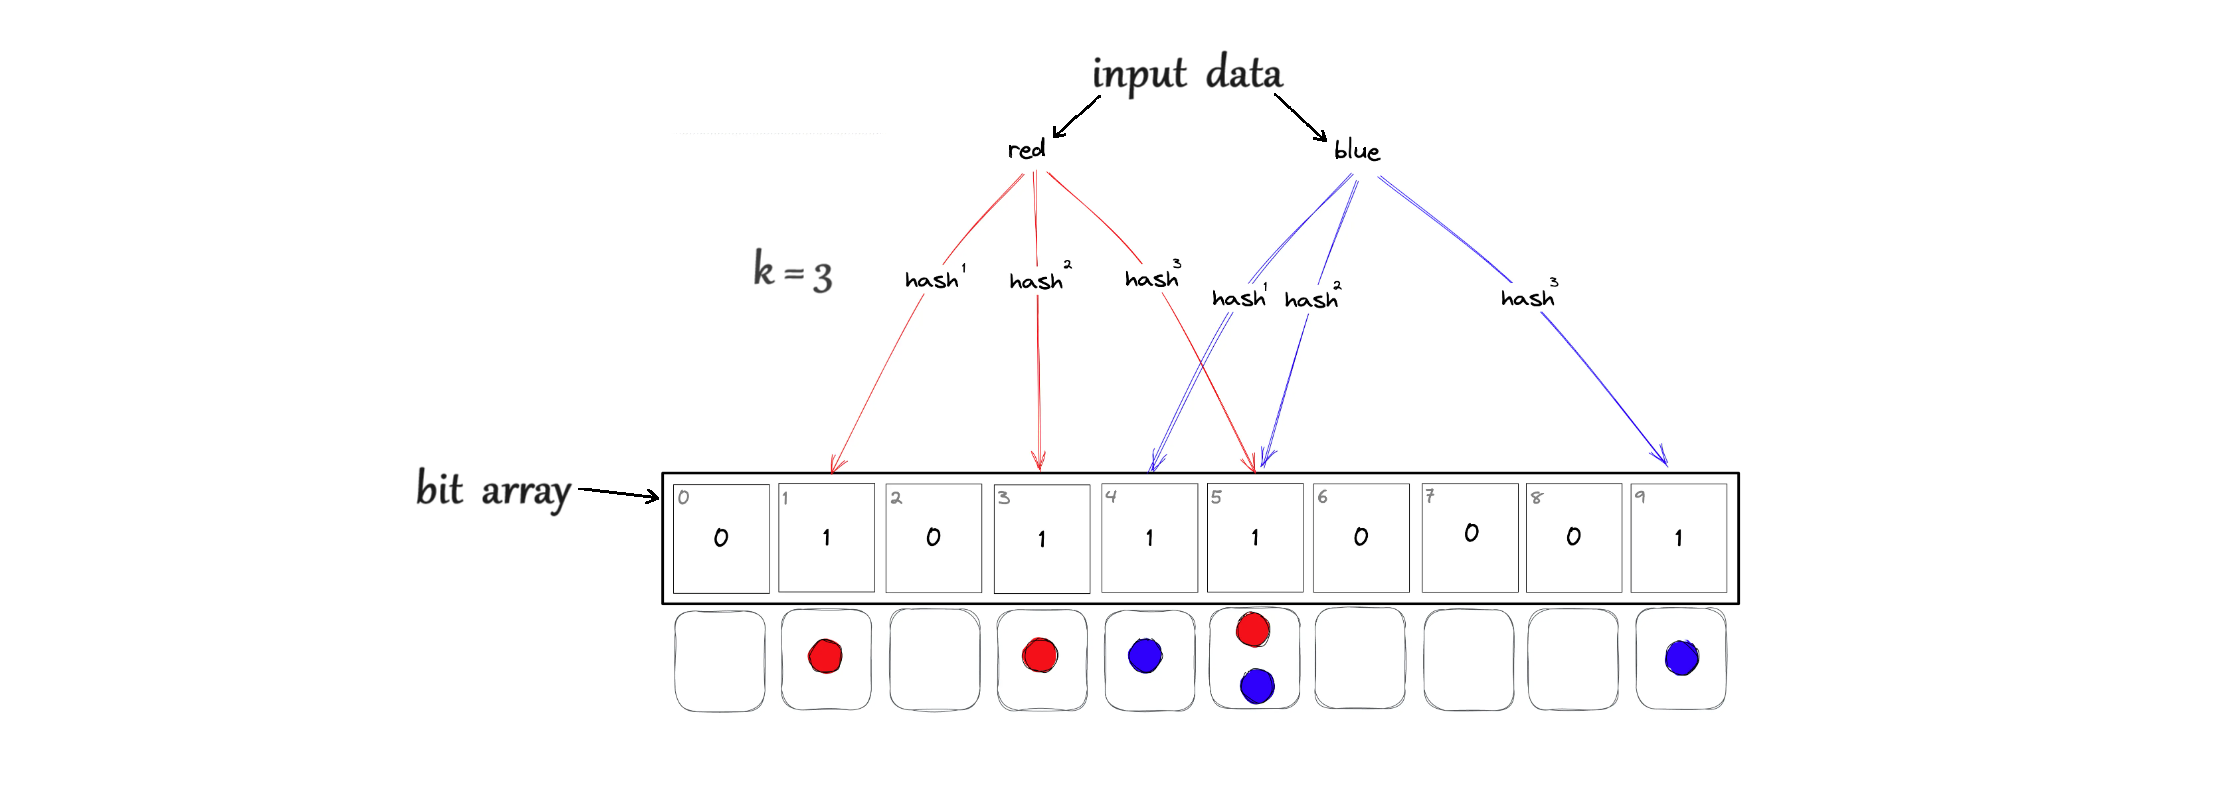

The hash functions should be:
  * Fast - Computation of hash values ​​should be fast so that addition and verification operations are not delayed.
  * Different - Each hash function should generate different hash values ​​for the same element. Independent hash functions are less likely to produce the same hash value for different elements. This reduces the chance of collisions, where two distinct elements are mapped to the same position in the Bloom filter's bit array. With fewer collisions, the accuracy of the Bloom filter increases, minimizing false positives. Independent hash functions help distribute elements uniformly across the bit array. If hash functions are not independent, certain positions in the bit array may become more likely to be set to 1, leading to uneven distribution and potentially higher false positive rates. Non-independent hash functions may exhibit biases or patterns in their output, especially when dealing with similar types of data. This can lead to clusters of hashed values, increasing the likelihood of collisions and false positives. Independent hash functions mitigate such biases, ensuring a more random distribution of hash values.

Bloom filters usually use non-cryptographic hash functions (MurmurHash3, Fowler–Noll–Vo hash). They are simpler and easier to implement compared to cryptographic hash functions (MD5, SHA2). They also tend to produce low collision rates, which is crucial for maintaining the effectiveness of Bloom filters. **MurmurHash3** (MMH3) is one of the most efficient hash functions, widely used for its speed and good distribution of hash values. This is basic example using the mmh3 library:

In [12]:
# example data to hash:
key = "vesi"

# different seed values:
seed1 = 47
seed2 = 123

# generate and return 32-bit integer hash value with sign:
hash_value1 = mmh3.hash(key, seed1)
hash_value2 = mmh3.hash(key, seed2)

print(f"The hash value with seed1 is: {hash_value1}")
print(f"The hash value with seed2 is: {hash_value2}")

The hash value with seed1 is: -1135793735
The hash value with seed2 is: 1249438216


In [13]:
# function to measure time of MurmurHash3:
def test_murmurhash3(data):
    start_time = time.time()
    hash_value = mmh3.hash(data)
    end_time = time.time()
    measured_time = end_time - start_time
    
    return hash_value, measured_time

# function to measure time of MD5:
def test_md5(data):
    start_time = time.time()
    hash_object = hashlib.md5(data)
    hash_value = hash_object.hexdigest()
    end_time = time.time()
    measured_time = end_time - start_time
    
    return hash_value, measured_time

# sample data:
data = b"Bloom filters"

# number of iterations:
num_iterations = 10000

# measure time for MMH3:
mmh3_times = []
for _ in range(num_iterations):
    _, time_taken = test_murmurhash3(data)
    mmh3_times.append(time_taken)
    sum_mmh3_times = sum(mmh3_times)

# measure time for MD5:
md5_times = []
for _ in range(num_iterations):
    _, time_taken = test_md5(data)
    md5_times.append(time_taken)
    sum_md6_times = sum(md5_times)

avg_time_mmh3 = sum_mmh3_times / num_iterations
avg_time_md5 = sum_md6_times / num_iterations

print("Average time taken for MurmurHash3:", avg_time_mmh3, "seconds")
print("Average time taken for MD5:", avg_time_md5, "seconds")

Average time taken for MurmurHash3: 1.373291015625e-07 seconds
Average time taken for MD5: 3.3451080322265625e-06 seconds


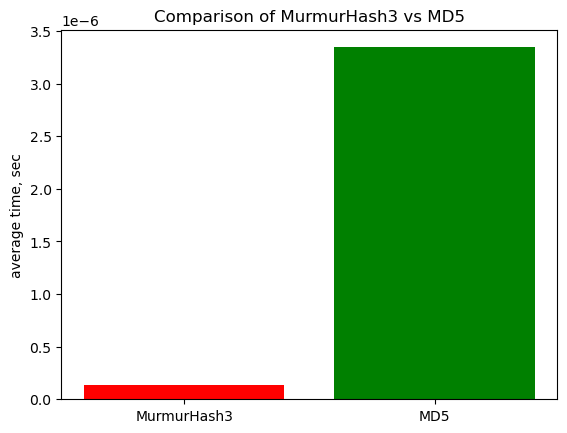

In [34]:
labels = ["MurmurHash3", "MD5"]
avg_times = [avg_time_mmh3, avg_time_md5]
colors = ["red", "green"]

plt.bar(labels, avg_times, color=colors)
plt.ylabel("average time, sec")
plt.title("Comparison of MurmurHash3 vs MD5")
plt.show()

These are basic steps of how MMH3 works:
1. Initializing: It starts by initializing an initial hash (seed), which can be user-defined or default. The seed in MMH3 allows to customize the hash function's behavior and produce different hash values for the same input data by changing the seed value.
2. Block splitting: The input data is then divided into 32-bit (4-byte) blocks. If the data length is not a multiple of 4, extra bytes are added.
3. Mixing: Then each block undergoes several bit operations (shift, multiply and XOR) to achieve a good distribution of bits and the seed is mixed with the block data and the current hash value.
4. Handling remaining bytes: Any remaining bytes that are not part of the full blocks are processed similarly and added to the final hash.
5. Finally, the hash goes through additional shuffling steps to ensure that all bits of the original data are evenly distributed in the final hash.

# 6. Working of Bloom filter 

## Operations
Primary operations supported by Bloom filters are two - insertion and lookup.

### Insertion
Insertion is adding an element to the Bloom filter. Time complexity of insertion is O(k), where *k* is the number of hash functions. Each insertion requires *k* hash computations and setting *k* bits in the bit array. Initially bit array consists of *m* bits. The first step is to accept the input data. The algorithm performs hashing to convert input data into a numerical value - compute *k* different hash values for the element using *k* independent hash functions. Next, perform the mod operation to the hash values by the length of the bit array (*m*). Each resulting value is used to determine a position in the bit array. For each calculated position, the corresponding bit in the bit array is set to 1.

**Example:** The size of bit array is *m* = 7. Input data *x* = "vesi". Number of hash functions *k* = 3. Results of hash functions are $ h_1(x) = 1249438216, h_2(x) = 9532534218, h_3(x) = 8013150679 $. \
The position is calculated as: 
$$ position_1 = h_1(x) \% m $$
$$ position_2 = h_2(x) \% m $$ 
$$ position_3 = h_3(x) \% m $$
The $ position_1 = 5 $, $ position_2 = 4 $ and $ position_3 = 2 $. These positions in the bit array are set to 1. So the Bloom filter bit array is now updated with the new inserted element *x*.


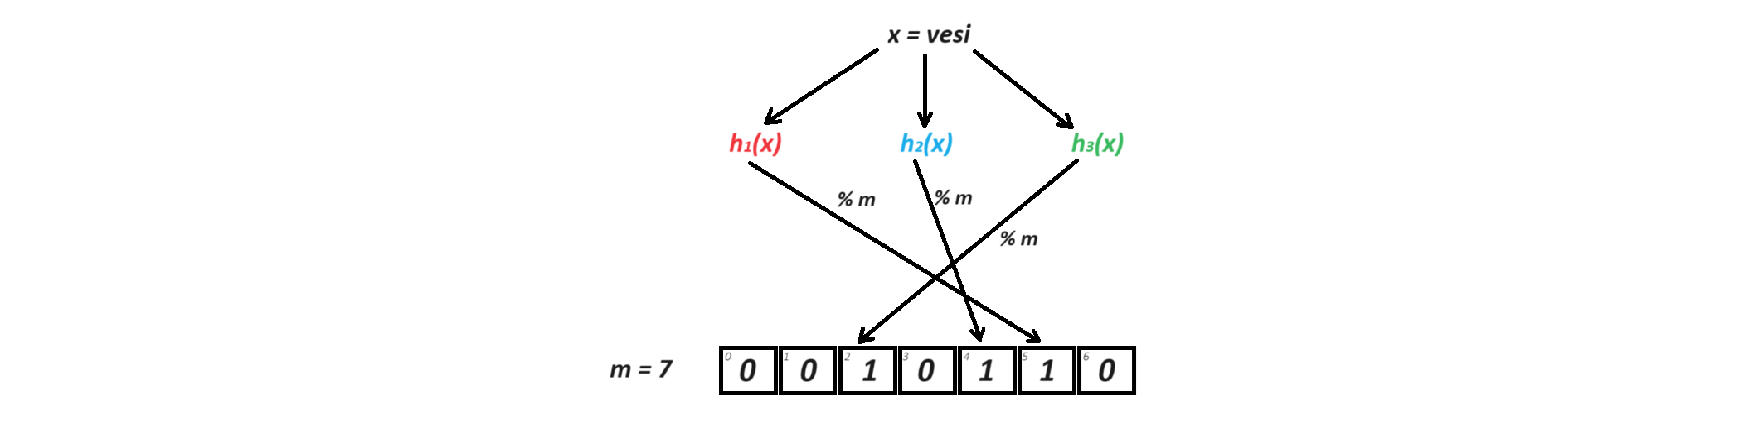

### Lookup / Query

Lookup also called **Membership test** checks if an element is present in the Bloom filter. Time complexity of lookup operation is O(k). Each query requires *k* hash computations and checking *k* bits in the array. To check for the presence of an element, the same hash functions are used. The resulting hash values ​​are then divided modulo the size of the bit array *m*. The results are used to determine the positions (indices) in the bit array. If all the corresponding bits are set to 1, the element is assumed to be present in the set (with a chance of false positives). If any bit is 0 or all bits are 0, the element is definitely not in the set.

**Example:** 
The input data which will be checked *x* = "ves". Using the same hash functions: $ h_1(x) = 495555437, h_2(x) = 7051540434, h_3(x) = 1564355438 $. \
The positions are calculated in the same way:
$$ position_1 = h_1(x) \% m $$
$$ position_2 = h_2(x) \% m $$
$$ position_3 = h_3(x) \% m $$
Final results are: $ position_1 = 6 $, $ position_2 = 4 $ and $ position_3 = 2 $, but index 6 in bit array is 0 $ \implies $ element *x* = "ves" is not in the Bloom filter.

Bloom filters can be extended with additional operations like union and intersection and adapted for deletions using Counting Bloom Filters. The use of multiple hash functions ensures a good distribution of elements, while the possibility of false positives (but not false negatives) is a trade-off for space efficiency.

**Deletion Operation**
Bloom filters typically do not support deletion of elements. This is because deleting an element would require setting bits back to 0, which could potentially affect other elements due to collisions.

### Probabilities associated with these operations

**False Positive Probability** - error rate in a Bloom filter indicates the probability that a lookup operation mistakenly identifies an element as "present" when it has not actually been inserted into the filter. This probability depends on several factors: 
* Number of hash functions (*k*) - the number of hash functions used affects the probability of false positives. With more hash functions, the probability of false positives decreases.
* Size of the bit array (*m*) - the size of the bit array determines the total number of bits available for storage. A larger bit array reduces the probability of collisions (multiple elements hashing to the same bit). This leads to reducing false positives. The number of bits *m* is typically much larger than the number of elements expected to store.
* Number of inserted elements - as more elements are inserted into the Bloom filter, the probability of false positives typically increases because more bits are set to 1.
 
The false positive probability $ P_fp $ can be approximated using the formula derived from the properties of the Bloom filter. Assumption: In a Bloom filter, each hash function independently and uniformly maps elements into the bit array and chooses one of *m* positions with equal probability, so the probability of a given bit not being set by a particular hash function is: 
$$ \frac{m - 1}{m} = 1 - \frac{1}{m} $$
And the probability for all *k* hash functions is: $$ (1 - \frac{1}{m})^k $$ 
For large *k*, this can be approximated as $ e^{-k/m} $
$$ (1 - \frac{1}{m})^k \approx e^{-k/m} $$
After inserting *n* elements into the Bloom filter, the probability that a given bit remains 0 is: $$ (1 - \frac{1}{m})^{kn} \approx  e^{-kn/m} = p $$
*p* is an approximation for the probability that a specific bit remains 0. It is used to simplify $ (1 - \frac{1}{m})^{kn} $ when it is very small. 

The probability that a given bit becomes 1 after *n* insertions is: $$ 1 - (1 - \frac{1}{m})^{kn} \approx (1 - p) $$
After *n* insertions, each bit in the array has a chance of being set to 1 with the probability above. The probability that *k* bits are set to 1, which would lead to a false positive result for set membership, is often referred to as the false positive rate $ \epsilon $:
$$ \epsilon = (1 - (1 - \frac{1}{m})^{kn})^k \approx (1 - p)^k $$
$ P_fp $ measures the probability that the Bloom filter will return a positive result when checking an element that is not actually inserted into it.

The formula used to determine the optimal size of the bit array *m*, by given expected number of elements *n* and the desired false positive probability is: 
$$ m = - \frac{n\ln(p)}{(ln(2))^2} $$

The optimal number of hash functions in a Bloom filter depends on the calculated size of the bit array *m* and expected number of elements *n*. The formula which determines the optimal number of hash functions *k* is:
$$ k = \frac{m}{n} ln(2) $$

In [107]:
class MyBloomFilter:
    def __init__(self, n, error_rate, base_seed=0):
        self.n = n # predicted number of elements that i want to store in bit array
        self.error_rate = error_rate # desired maximum false positive rate
        self.base_seed = base_seed # base seed for hash functions
        
        self._actual_num_bits = self._calculate_num_bits(n, error_rate) # calculated number of bits in bit array (m)
        self._num_hashes = self._calculate_num_hashes(self._actual_num_bits, n) # calculated number of hash functions needed
        self.bit_array = bitarray.bitarray(self._actual_num_bits) # set bit array
        self.bit_array.setall(0)
        self.elements = set()
        
    def insert(self, element):
        for i in range(self._num_hashes):
            # generates a hash value for the element and sets the corresponding bit to 1
            seed = self.base_seed + i
            hash_value = mmh3.hash(element, seed) % self._actual_num_bits
            self.bit_array[hash_value] = 1
            self.elements.add(element)
        
    def lookup(self, element):
        for i in range(self._num_hashes):
            # generates a hash value for the element and checks if the corresponding bit is 1
            seed = self.base_seed + i
            hash_value = mmh3.hash(element, seed) % self._actual_num_bits
            
            if self.bit_array[hash_value] == 0:
                return "Not in array" # if any of the bits is 0, the element is definitely not present
                
        return "Maybe in array" # if all the bits are 1, the element may be present
    
    def _calculate_num_bits(self, n, error_rate):
        # calculates the number of bits needed for a given capacity and error rate
        actual_num_bits = - (n * math.log(error_rate)) / (math.log(2) ** 2)
        return int(actual_num_bits)
    
    def _calculate_num_hashes(self, actual_num_bits, n):
        # calculates the number of hash functions needed for a given (expected) number of bits and actual number of bits
        num_hashes = (actual_num_bits / n) * math.log(2)
        return int(num_hashes)

In [135]:
n = 50
error = 0.01

bf = MyBloomFilter(m, error, base_seed=47)

for el in ["vesi", "ivan", "petio", "pet", "asdas", "ojar"]:
    bf.insert(el)

print(bf.lookup("vesi")) 
print(bf.lookup("alex")) 
print(bf.lookup("pet")) 

Maybe in array
Not in array
Maybe in array


### Runtime Analysis of Operations

Runtime analysis of operations and space complexity analysis highlight the efficiency and scalability of Bloom filters for membership testing operations, especially when dealing with large datasets and requiring fast query times. 
* Insertion - when inserting an element into a Bloom filter it computes the hash values using *k* hash functions. For each hash function, it computes the index in the bit array and set those indices to 1. So computing each hash value typically takes O(1) time. Setting each bit in the bit array also takes O(1) time. Since there are *k* hash functions, the total time complexity for the insertion operation is O(k).

In [136]:
class TestBF:
    def __init__(self, n, hash_count):
        self.n = n
        self.hash_count = hash_count
        self.bit_array = bitarray.bitarray(n)
        self.bit_array.setall(0)
        
    def insert(self, element):
        for i in range(self.hash_count):
            hash_value = mmh3.hash(element) % self.n
            self.bit_array[hash_value] = 1
        
    def lookup(self, element):
        for i in range(self.hash_count):
            hash_value = mmh3.hash(element) % self.n
            
            if self.bit_array[hash_value] == 0:
                return "Not in array"
                
        return "Maybe in array"

Inserted 1000 elements in 0.003 seconds
Inserted 5000 elements in 0.013 seconds
Inserted 10000 elements in 0.025 seconds
Inserted 20000 elements in 0.070 seconds
Inserted 50000 elements in 0.139 seconds
Inserted 100000 elements in 0.251 seconds


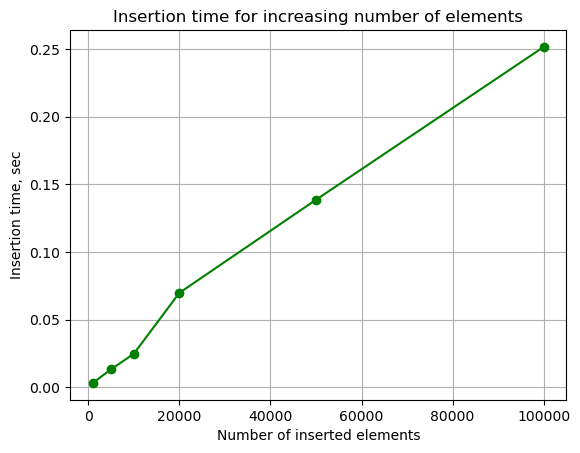

In [220]:
def measure_insertion_time(bloom_filter, num_elements):
    start_time = time.time()
    for i in range(num_elements):
        item = str(i)
        bloom_filter.insert(item)
    end_time = time.time()
    
    return end_time - start_time


# parameters
n = 1000000
hash_count = 10
element_counts = [1000, 5000, 10000, 20000, 50000, 100000]
times = []

# measure performance for different numbers of elements
for num_elements in element_counts:
    bf = TestBF(n, hash_count)
    elapsed_time = measure_insertion_time(bf, num_elements)
    times.append(elapsed_time)
    print(f"Inserted {num_elements} elements in {elapsed_time:.3f} seconds")


plt.plot(element_counts, times, marker='o', color="green")
plt.xlabel("Number of inserted elements")
plt.ylabel("Insertion time, sec")
plt.title("Insertion time for increasing number of elements")
plt.grid(True)
plt.show()

Lookup for 1 hash functions in 0.001 seconds
Lookup for 5 hash functions in 0.003 seconds
Lookup for 7 hash functions in 0.004 seconds
Lookup for 13 hash functions in 0.006 seconds
Lookup for 21 hash functions in 0.021 seconds


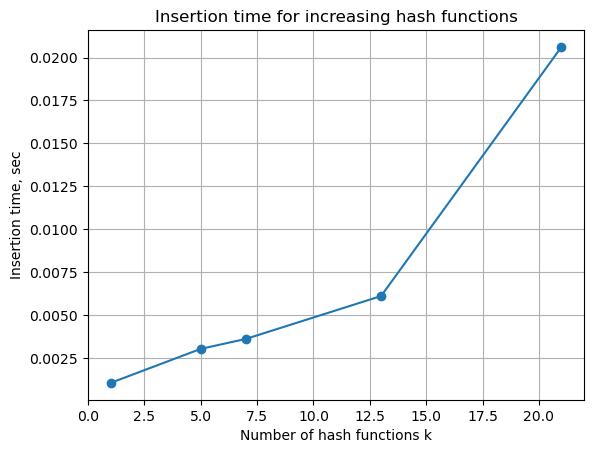

In [228]:
def measure_insertion_time_hash_count(array_size, num_elements):
    hash_counts = [1, 5, 7, 13, 21]
    times = []
    
    for count in hash_counts:
        bf = TestBF(array_size, count)
        start_time = time.time()
        for i in range(num_elements):
            item = str(i)
            bf.insert(item)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        print(f"Lookup for {count} hash functions in {elapsed_time:.3f} seconds")

    
    return hash_counts, times

array_size = 1000
num_elements = 1000

hash_counts, times = measure_insertion_time_hash_count(array_size, num_elements)

plt.plot(hash_counts, times, marker='o')
plt.xlabel("Number of hash functions k")
plt.ylabel("Insertion time, sec")
plt.title("Insertion time for increasing hash functions")
plt.grid(True)
plt.show()

* **Lookup** - when checking for the presence of an element in a Bloom filter it computes the hash values using *k* hash functions. Since there are *k* hash functions, the total time complexity for the lookup operation is also O(k).

Lookup for 1000 elements in 0.010 seconds
Lookup for 5000 elements in 0.008 seconds
Lookup for 10000 elements in 0.047 seconds
Lookup for 20000 elements in 0.092 seconds
Lookup for 50000 elements in 0.240 seconds
Lookup for 100000 elements in 0.522 seconds


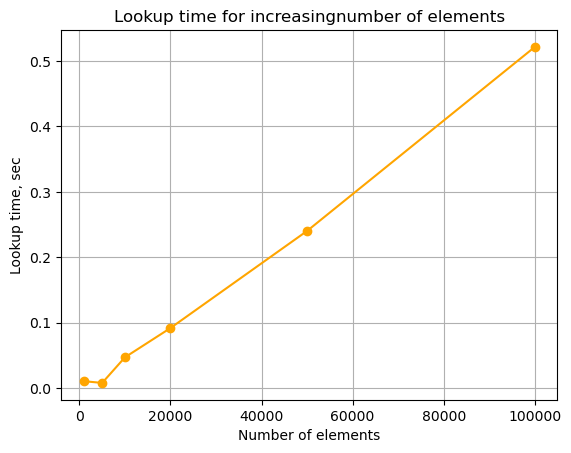

In [221]:
def measure_lookup_time(bloom_filter, num_elements):
    start_time = time.time()
    for i in range(num_elements):
        item = str(i)
        bloom_filter.lookup(item)
    end_time = time.time()
    return end_time - start_time


# parameters
filter_size = 1000000
hash_count = 10
element_counts = [1000, 5000, 10000, 20000, 50000, 100000]
lookup_times = []

# measure performance for different numbers of elements
for num_elements in element_counts:
    bf = TestBF(filter_size, hash_count)
    # First, insert all elements into the Bloom filter
    for i in range(num_elements):
        item = str(i)
        bf.insert(item)
    
    # measure lookup time
    elapsed_time = measure_lookup_time(bf, num_elements)
    lookup_times.append(elapsed_time)
    print(f"Lookup for {num_elements} elements in {elapsed_time:.3f} seconds")

plt.plot(element_counts, lookup_times, marker='o', color="orange")
plt.xlabel("Number of elements")
plt.ylabel("Lookup time, sec")
plt.title("Lookup time for increasingnumber of elements")
plt.grid(True)
plt.show()

### Space complexity analysis

The actual size *m* of the bit array directly impacts the memory usage of the Bloom filter. A larger *m* reduces the false positive rate (*p*) but increases memory requirements. Typically, *m* is set based on predicted number of inserted elements *n* and p, to have balance between memory usage and false positive rate.

### Comparison with hash table
Compared to a hash table where a single hash function is used, Bloom Filter uses multiple hash functions to avoid hash collisions.